In [15]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from py21cmsense import GaussianBeam, Observatory, Observation, PowerSpectrum

In [26]:
from py21cmsense import hera

In [32]:
pos = hera(7, l=14, dl=12.12)

In [45]:
ps = np.load('../notebooks/ps_21.npz')
k = ps['k']
zs = ps['zs']
nu_s = ps['nu_s']

lat = -30.72 * np.pi / 180.
layout_350 = np.loadtxt('../hera_positions_staged/antenna_positions_350.dat',
                        delimiter=' ')

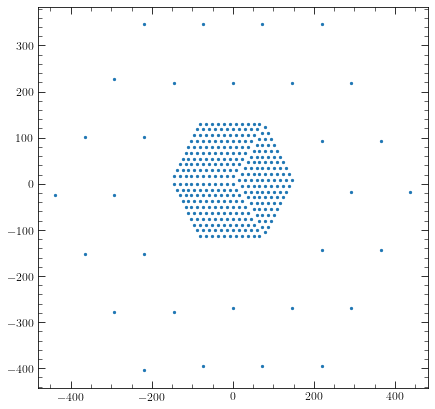

In [46]:
plt.figure(figsize=(7,7))
plt.scatter(layout_350[:, 0], layout_350[:, 1], s = 5)
plt.show()

In [49]:
sensitivity = PowerSpectrum(observation = Observation(
                                            observatory = Observatory(
                                                antpos = layout_350,
                                                beam = GaussianBeam(frequency=nu_s[0], dish_size=14.2),
                                                latitude = lat
                                            ), redundancy_tol = 0
                        
                            ),
                            foreground_model = 'moderate',
                            k_21 = k,
                            delta_21 = ps[str(zs[0])]
                        )

In [50]:
moved = sensitivity.calculate_sensitivity_1d()

averaging to 1D: 100%|██████████| 975/975 [00:47<00:00, 20.57kpar bins/s]


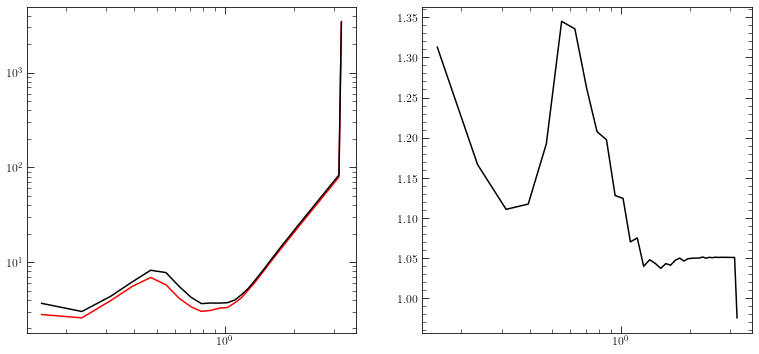

In [51]:
plt.figure(figsize = (13, 6))

plt.subplot(121)
plt.plot(sensitivity.k1d, moved, color = 'red')
plt.plot(sensitivity.k1d, noise, color = 'black')
plt.xscale('log')
plt.yscale('log')

plt.subplot(122)
plt.plot(sensitivity.k1d, noise / moved, color = 'black')
plt.xscale('log')
plt.show()